In [ ]:
pip install yfinance

In [ ]:
pip install finta #FInancial TEchinical Analaysis

In [ ]:
pip install Yahoo-ticker-downloader


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-py3-none-any.whl size=10165 sha256=ee7b20856383f65a7c2f7f642f6ac54b3de0218ad9c0c83f5a5df3ae528e9ed9
  Stored in directory: /root/.cache/pip/wheels/d0/e8/c5/096d50b106a31b8631622e87cecf82053bf0887e289624f05c
Successfully built Yahoo-ticker-downloader


In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from googlesearch import search

In [ ]:
company_name=input("Enter a company name: ")


Enter a company name: hdfcbank


In [ ]:
searchval = 'yahoo finance '+company_name
link = []
#limits to the first link
for url in search(searchval, tld='es', lang='es', stop=1):
  link.append(url)

link = str(link[0])
link=link.split("/")
if link[-1]=='':
  ticker=link[-2]
else:
  x=link[-1].split('=')
  ticker=x[-1]
symbol=ticker
print(symbol)

HDFCBANK.NS


In [ ]:
NUM_DAYS = 10000     # Here, there is 10000 days, we have to reduce this according to our needs
INTERVAL = '1d'     # Sample rate of historical data, we can use weeks and all

INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX'] #Column name of Yahoo finance

In [ ]:
start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)

print(data['close']) #as a professional trader myself, we predict from the closing dates


[*********************100%%**********************]  1 of 1 completed

Date
1996-12-11       3.790000
1996-12-12       3.775000
1996-12-13       3.750000
1996-12-16       3.815000
1996-12-17       3.885000
                 ...     
2024-04-22    1512.199951
2024-04-23    1507.599976
2024-04-24    1511.699951
2024-04-25    1510.750000
2024-04-26    1509.800049
Name: close, Length: 6869, dtype: float64


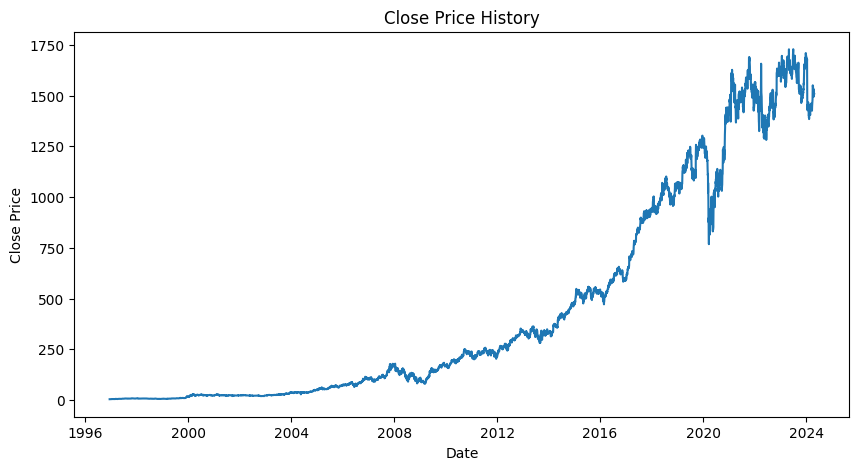

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
data.to_csv('f1.csv')

In [ ]:
df=pd.read_csv('f1.csv') #CSV files

In [ ]:
df

,Date,open,high,low,close,Adj Close,volume
0,1996-12-11,3.750000,3.800000,3.740000,3.790000,3.005115,381000
1,1996-12-12,3.825000,3.830000,3.730000,3.775000,2.993221,413000
2,1996-12-13,3.730000,3.790000,3.725000,3.750000,2.973398,230000
3,1996-12-16,3.825000,3.840000,3.755000,3.815000,3.024937,526000
4,1996-12-17,3.805000,3.900000,3.785000,3.885000,3.080441,636000
...,...,...,...,...,...,...,...
6864,2024-04-22,1557.400024,1557.400024,1508.300049,1512.199951,1512.199951,21149219
6865,2024-04-23,1526.300049,1526.500000,1503.250000,1507.599976,1507.599976,13413530
6866,2024-04-24,1515.000000,1521.750000,1509.050049,1511.699951,1511.699951,11220790
6867,2024-04-25,1506.250000,1519.699951,1506.250000,1510.750000,1510.750000,17722602


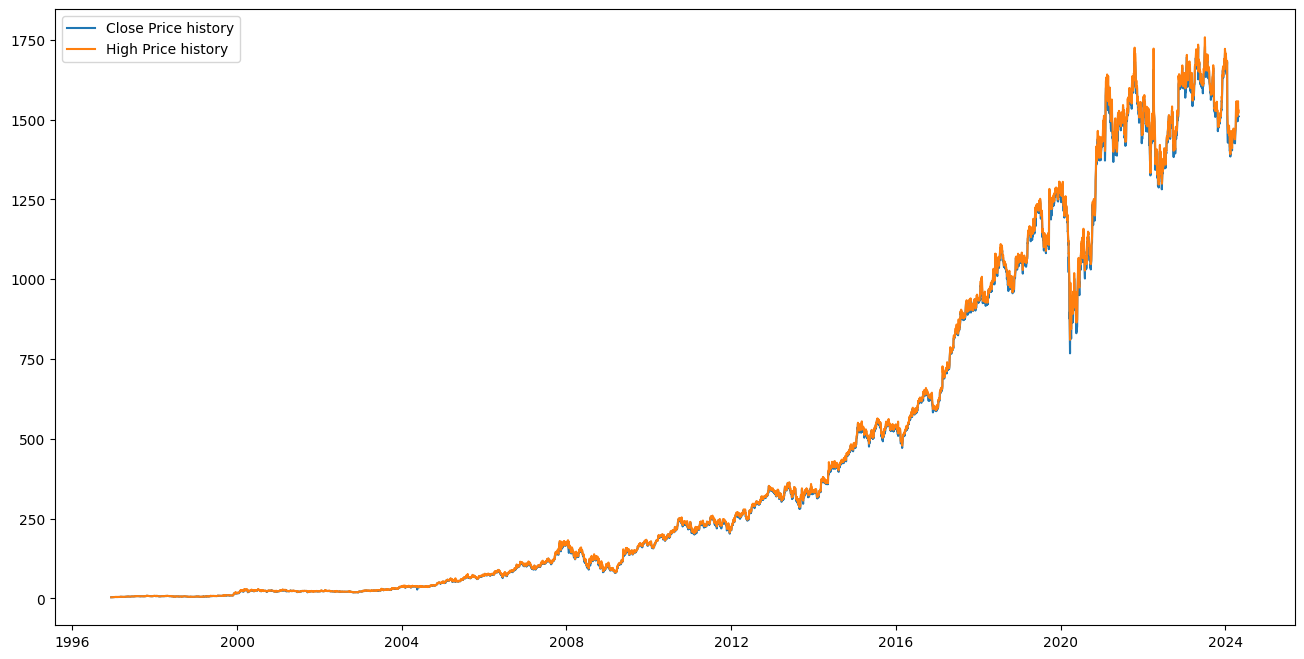

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='Close Price history')
plt.plot(df['high'], label='High Price history')
plt.legend()
plt.show()  #BCZ closing and high price are the most

In [ ]:
#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date','close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['close'][i] = data['close'][i]

In [ ]:
new_data.Date

0       1996-12-11 00:00:00
1       1996-12-12 00:00:00
2       1996-12-13 00:00:00
3       1996-12-16 00:00:00
4       1996-12-17 00:00:00
               ...         
6864    2024-04-22 00:00:00
6865    2024-04-23 00:00:00
6866    2024-04-24 00:00:00
6867    2024-04-25 00:00:00
6868    2024-04-26 00:00:00
Name: Date, Length: 6869, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values

train = dataset[0:3000, :] # 3000 dayes of data for train
valid = dataset[3000:, :] # rest for test

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

#create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=2)

#epochs 2-> bcz over processing makes rms error zyada

Epoch 1/2
2940/2940 - 94s - loss: 1.8994e-05 - 94s/epoch - 32ms/step
Epoch 2/2
2940/2940 - 89s - loss: 9.9328e-06 - 89s/epoch - 30ms/step


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = scaler.transform(inputs)
print(inputs.shape[0])
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
print(X_test)
from numpy import newaxis
X_test = X_test[:, :, newaxis]

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
#actual processing

3929
[[0.08483284 0.08255966 0.0795935  ... 0.06836383 0.07046595 0.07223173]
 [0.08255966 0.0795935  0.07806837 ... 0.07046595 0.07223173 0.07387863]
 [0.0795935  0.07806837 0.07793789 ... 0.07223173 0.07387863 0.07118502]
 ...
 [0.82553859 0.84209462 0.82991682 ... 0.88581872 0.87474267 0.87207516]
 [0.84209462 0.82991682 0.84136975 ... 0.87474267 0.87207516 0.87445272]
 [0.82991682 0.84136975 0.83536785 ... 0.87207516 0.87445272 0.87390185]]
121/121 [==============================] - 3s 18ms/step


In [ ]:
rms = np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms) # rms -> root means square

20.49307766684469


<ipython-input-60-cd78f05b6c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


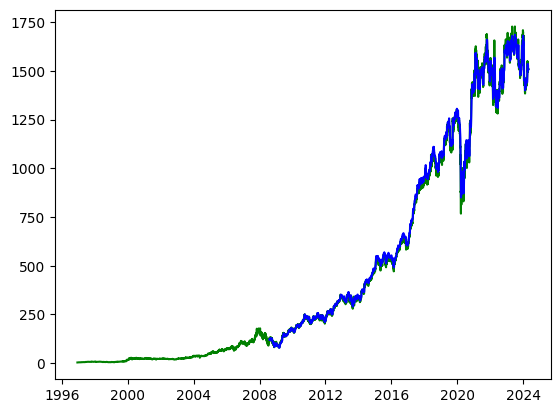

In [ ]:
#for plotting
train = new_data[:3000]
valid = new_data[3000:]
valid['Predictions'] = closing_price
plt.plot(new_data['close'],label='actual',color = 'green')
plt.plot(valid['Predictions'],label='prediction',color = 'blue')
plt.show()

#Yagna-> we are predicting here, not forecasting,(For future refrence) hope u remember this difference

In [ ]:

"""
next_week_dates = pd.date_range(start=data.index[-1], periods=7, freq='D')
next_week_data = pd.DataFrame(index=next_week_dates, columns=['predicted close'])
for date in next_week_dates:
    inputs = new_data[len(new_data) - len(valid) + 490:].values
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = X_test[:, :, newaxis]
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    next_week_data.loc[date, 'predicted close'] = closing_price[next_week_dates.get_loc(date)]

print(next_week_data)
"""
#THis is for experiment dont use this

"\nnext_week_dates = pd.date_range(start=data.index[-1], periods=7, freq='D')\nnext_week_data = pd.DataFrame(index=next_week_dates, columns=['predicted close'])\nfor date in next_week_dates:\n    inputs = new_data[len(new_data) - len(valid) + 490:].values\n    inputs = scaler.transform(inputs)\n    X_test = []\n    for i in range(60, inputs.shape[0]):\n        X_test.append(inputs[i-60:i, 0])\n    X_test = np.array(X_test)\n    X_test = X_test[:, :, newaxis]\n    closing_price = model.predict(X_test)\n    closing_price = scaler.inverse_transform(closing_price)\n    next_week_data.loc[date, 'predicted close'] = closing_price[next_week_dates.get_loc(date)]\n\nprint(next_week_data)\n"

In [ ]:
"""
#for plotting
plt.plot(new_data['close'][len(new_data)-100:],label='actual',color = 'green')
plt.plot(next_week_data['predicted close'],label='forecast',color='red')
plt.show()
"""

"\n#for plotting\nplt.plot(new_data['close'][len(new_data)-100:],label='actual',color = 'green')\nplt.plot(next_week_data['predicted close'],label='forecast',color='red')\nplt.show()\n"

In [ ]:

last_closing_price = valid['close'][-1]
# Get the last 60 closing prices
last_60_closing_prices = valid['close'][-60:]

scaled_last_60_closing_prices = scaler.transform(last_60_closing_prices.values.reshape(-1, 1))

last_60_closing_prices_3d = np.array(scaled_last_60_closing_prices).reshape(1, 60, 1)

next_day_opening_price = model.predict(last_60_closing_prices_3d) [0] [0]

next_day_opening_price = scaler.inverse_transform([[next_day_opening_price]])[0][0]

# Print the predicted AVG price
print(f"Predicted AVG price for next day: {next_day_opening_price}")

1/1 [==============================] - 0s 32ms/step
Predicted Closing price for next day: 1508.312748960103
